# Binaların Enerji Verimliliği

Bu proje içerisinde binaların ısıtma ve soğutma yükü tahmin edilmeye çalışılacaktır.

Veri Seti Link: https://www.kaggle.com/elikplim/eergy-efficiency-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ENB2012_data.csv")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
data.columns = ["Relative Compactness", 
                 "Surface Area", 
                 "Wall Area", 
                 "Roof Area", 
                 "Overall Height",
                 "Orientation", 
                 "Glazing Area", 
                 "Glazing Area Distribution",
                 "Heating Load",
                 "Cooling Load"]

In [4]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.shape

(768, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
data.describe().columns  #Kategorik veri yok

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [9]:
data.corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889431,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing Area Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-0.002587,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


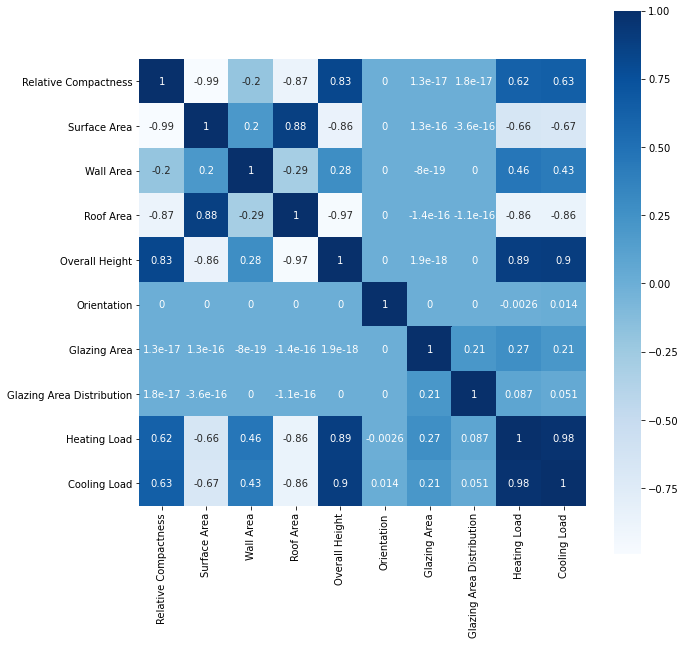

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),square=True,cmap="Blues", linecolor='w',annot=True, ax=ax) 

In [11]:
data.isnull().sum() #null değer yok

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

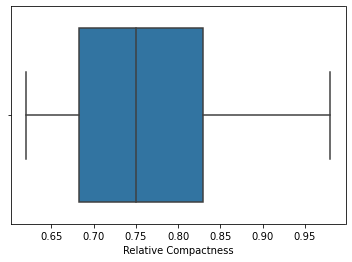

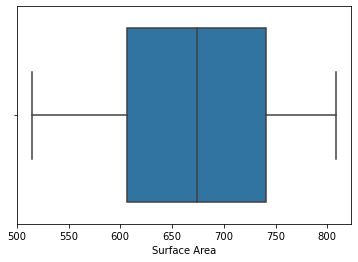

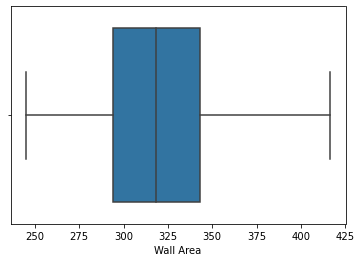

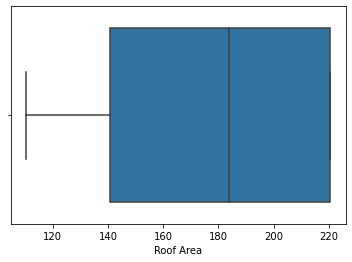

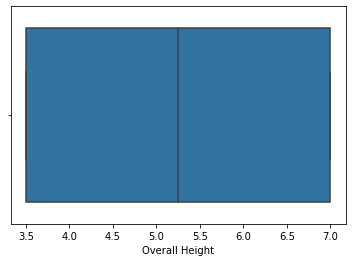

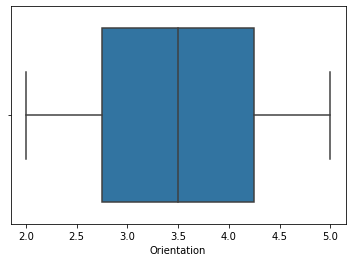

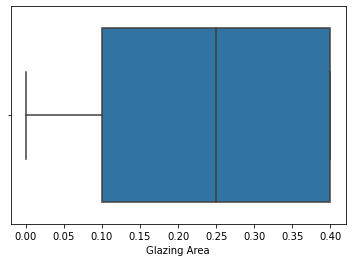

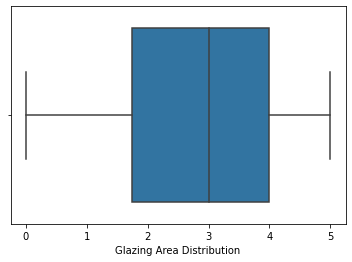

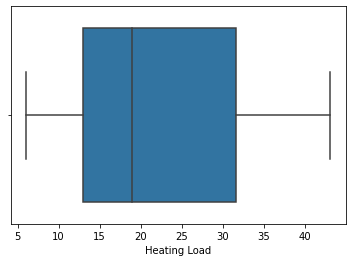

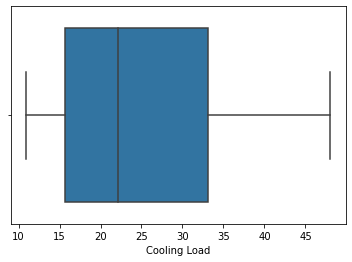

In [12]:
#outliers yok
for col in data.columns:
    sns.boxplot(data[col])
    plt.show()

In [13]:
def outliers(df, num_cols):
    for col in num_cols:
        Q1=df[col].quantile(0.05)
        Q3=df[col].quantile(0.95)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        df.loc[df[col]<lower_bound, col]=lower_bound
        df.loc[df[col]>upper_bound, col]=upper_bound
    return df

In [14]:
df = data.copy()
df = outliers(df,data.columns)

In [15]:
df.shape

(768, 10)

In [16]:
data.shape

(768, 10)

In [17]:
y_heat = data['Heating Load'].values
y_cool = data['Cooling Load'].values

In [18]:
data.drop(['Heating Load','Cooling Load'],axis=1,inplace=True)

In [19]:
x = data.values

# Isıtma/Soğutma Yükü Tahmini

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

x_train,x_test,y_train,y_test = train_test_split(x,y_heat,test_size=0.3,random_state = 1)
X_train,X_test,Y_train,Y_test = train_test_split(x,y_cool,test_size=0.3,random_state = 1)

In [21]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test sahpe:", y_test.shape)


x_train shape: (537, 8)
y_train shape: (537,)
x_test shape: (231, 8)
y_test sahpe: (231,)


In [22]:
def model(algo):
    #ısıtma
    m = algo().fit(x_train,y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train,m.predict(x_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test,m.predict(x_test)))
    #soğutma
    M = algo().fit(X_train,Y_train)
    Train_rmse = np.sqrt(mean_squared_error(Y_train,M.predict(X_train)))
    Test_rmse = np.sqrt(mean_squared_error(Y_test,M.predict(X_test)))
    return ((type(algo()).__name__,train_rmse,test_rmse),
            (type(algo()).__name__,Train_rmse,Test_rmse))


In [23]:
algo = [LinearRegression,Lasso,Ridge,ElasticNet]
res = {"model":[], "train_rmse":[], "test_rmse":[],"heat-cool":[]}

for i in algo:
    h,c = model(i)
    res["model"].append(h[0])
    res["train_rmse"].append(h[1])
    res['test_rmse'].append(round(h[2],6))
    res['heat-cool'].append("ısıtma")
    res["model"].append(c[0])
    res["train_rmse"].append(c[1])
    res['test_rmse'].append(round(c[2],6))
    res['heat-cool'].append("sogutma")

In [24]:
res = pd.DataFrame(res)
res

,model,train_rmse,test_rmse,heat-cool
0,LinearRegression,2.748155,3.289210,ısıtma
1,LinearRegression,3.032128,3.520408,sogutma
2,Lasso,4.442483,4.921447,ısıtma
3,Lasso,4.355642,4.784092,sogutma
4,Ridge,2.827995,3.369965,ısıtma
5,Ridge,3.124788,3.569436,sogutma
6,ElasticNet,4.305186,4.792449,ısıtma
7,ElasticNet,4.199961,4.640624,sogutma


In [25]:
ısıtma = res[res['heat-cool'] == 'ısıtma']

In [26]:
sogutma = res[res['heat-cool'] == 'sogutma']

Text(0.5, 1.0, 'SOGUTMA')

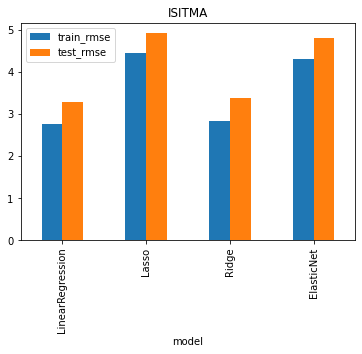

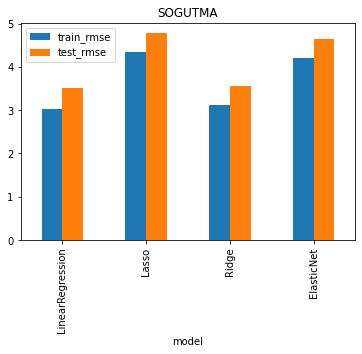

In [27]:

ısıtma.set_index('model').plot(kind='bar')
plt.title("ISITMA")
sogutma.set_index('model').plot(kind='bar')
plt.title("SOGUTMA")

## Tuning

In [28]:
from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
from sklearn.linear_model import  RidgeCV, LassoCV, ElasticNetCV
def tuning(algo,algo_cv,grid,cv=10):
    model_cv = algo_cv(alphas=grid,cv=cv)
    model_cv.fit(x_train,y_train)
    model_tuned = algo(alpha=model_cv.alpha_)
    model_tuned.fit(x_train,y_train)
    train_rmse=np.sqrt(mean_squared_error(y_train,model_tuned.predict(x_train)))
    test_rmse=np.sqrt(mean_squared_error(y_test,model_tuned.predict(x_test)))
    
    model_cv = algo_cv(alphas=grid,cv=cv)
    model_cv.fit(X_train,Y_train)
    model_tuned = algo(alpha=model_cv.alpha_)
    model_tuned.fit(X_train,Y_train)
    Train_rmse=np.sqrt(mean_squared_error(Y_train,model_tuned.predict(X_train)))
    Test_rmse=np.sqrt(mean_squared_error(Y_test,model_tuned.predict(X_test)))
    return ((type(algo()).__name__ , train_rmse,test_rmse),
            (type(algo()).__name__ , train_rmse,test_rmse))


In [30]:
models={Ridge: RidgeCV, Lasso:LassoCV, ElasticNet:ElasticNetCV}
res_tuned={'model':[], 'train_rmse':[], 'test_rmse':[],'heat-cool':[]}
alphas = [0.1,0.01, 0.005, 0.05, 0.001,0.2,0.3,0.5,0.8,0.9]
for model in models:
    H,C=tuning(model, models[model], alphas)
    res_tuned['model'].append(H[0])
    res_tuned['train_rmse'].append(H[1])
    res_tuned['test_rmse'].append(H[2])
    res_tuned['heat-cool'].append("ısıtma")
    res_tuned['model'].append(C[0])
    res_tuned['train_rmse'].append(C[1])
    res_tuned['test_rmse'].append(C[2])
    res_tuned['heat-cool'].append("sogutma")

In [31]:
res_tuned=pd.DataFrame(res_tuned)
res_tuned

,model,train_rmse,test_rmse,heat-cool
0,Ridge,2.748177,3.289503,ısıtma
1,Ridge,2.748177,3.289503,sogutma
2,Lasso,2.749783,3.292792,ısıtma
3,Lasso,2.749783,3.292792,sogutma
4,ElasticNet,2.802461,3.345224,ısıtma
5,ElasticNet,2.802461,3.345224,sogutma


Text(0.5, 1.0, 'SOGUTMA')

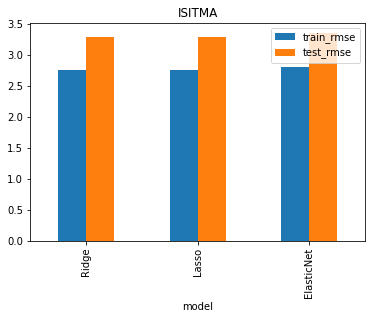

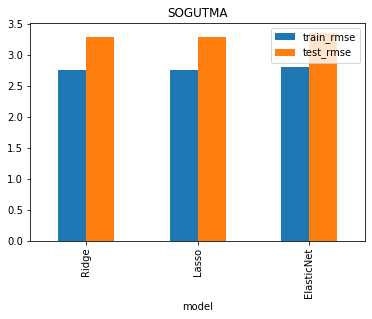

In [32]:
ısıtma = res_tuned[res_tuned['heat-cool'] == 'ısıtma']
sogutma = res_tuned[res_tuned['heat-cool'] == 'sogutma']

ısıtma.set_index('model').plot(kind='bar')
plt.title("ISITMA")
sogutma.set_index('model').plot(kind='bar')
plt.title("SOGUTMA")